<a href="https://colab.research.google.com/github/shanthiii/Internet-Analysis-Project/blob/master/Internet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Internet Analysis"""

'Internet Analysis'

In [ ]:
# pylint: disable=C0114, C0103, wrong-import-position, line-too-long, import-error

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import urllib.request

In [ ]:
dictionary = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
properties = ["Latency", "Server", "Download"]

In [ ]:
url = 'https://raw.githubusercontent.com/shanthiii/Internet-Analysis/main/statistics.log'
file = urllib.request.urlopen(url)
# with file as f:
lines = []
for line in file:
    decoded_line = line.decode("utf-8") 
    print(decoded_line)
    lines.append(decoded_line)
#     lines = f.readlines().decode('utf-8')
# print(lines)

Streaming output truncated to the last 5000 lines.
Packet Loss: Not available.

Mon Jun 28 18:48:01 IST 2021

     Server: TataSky Broadband Private Limited - Chennai (id = 37352)

    Latency:    39.11 ms   (21.68 ms jitter)

   Download:     8.64 Mbps (data used: 6.8 MB)                               

     Upload:     1.27 Mbps (data used: 1.3 MB)                               

Packet Loss:     0.0%

Mon Jun 28 18:50:01 IST 2021

     Server: Shyam Spectra - Chennai (id = 11562)

    Latency:   154.11 ms   (2.94 ms jitter)

   Download:     5.69 Mbps (data used: 8.8 MB)                               

     Upload:     1.21 Mbps (data used: 1.6 MB)                               

Packet Loss:     9.0%

Mon Jun 28 18:52:01 IST 2021

     Server: Cherrinet - K Net Solutions Pvt Ltd - Chennai (id = 8797)

    Latency:    54.08 ms   (9.95 ms jitter)

   Download:     8.15 Mbps (data used: 10.0 MB)                               

     Upload:     1.47 Mbps (data used: 1.4 MB)            

In [ ]:
for i in range(1,5):
    print(lines[i])

     Server: Airtel Broadband - Chennai (id = 18974)

    Latency:    39.54 ms   (21.98 ms jitter)

   Download:     6.63 Mbps (data used: 10.5 MB)                               

     Upload:     1.41 Mbps (data used: 2.1 MB)                               



In [ ]:
# with open('statistics.log') as f:
#     lines = f.readlines()

In [ ]:
# x = lines[0][0:3]
# global d
# global COUNT

In [ ]:
global COUNT
COUNT = -1
d = {}
global dicti
dicti = {}
n = len(lines)
print(n)
# def time_define(index):
#     COUNT += 1
#     dicti = {}
#     post_dict("day", x, dicti)
#     n = lines[index].strip().split(":")
#     m = len(n[0])
#     post_dict("hours", n[0][m-2:], dicti)
#     post_dict("minutes", n[1], dicti)
    # lines = f.readline()
    # n = lines.strip().split(":")

25732


In [ ]:
for i in range(n):
    # def post_dict(x, y, dicti):
    #     """ posting values to dicti dictionary """
    #     dicti[x] = y
    # print(i==n-1)
    x = lines[i][0:3]
    # print(i)
    if x in dictionary:
        # time_define(i)
        # print("inside",i)
        COUNT += 1
        d[COUNT] = dicti
        dicti = {}
        dicti["day"] = x

        # post_dict("day", x, dicti)
        n = lines[i].strip().split(":")
        m = len(n[0])
        dicti["hours"] = n[0][m-2:]
        dicti["minutes"] = n[1]

        # post_dict("hours", n[0][m-2:], dicti)
        # post_dict("minutes", n[1], dicti)
    else:
        n = lines[i].strip().split(":")
        attribute = n[0].strip()
        value = n[1].strip()
        # print(attribute,value)
        if attribute == 'Server':
            k = value.split("(")
            dicti['Server'] = k[0].strip()
            # post_dict('Server', k[0].strip(), dicti)
        elif attribute == 'Latency' and value != 'FAILED':
            k = value.split("(")
            b = k[0].strip().split("ms")
            dicti[attribute] = float(b[0].strip())

            post_dict('Latency', float(b[0].strip()), dicti)
            m = k[1].strip().split("ms")
            dicti['Jitter'] = float(m[0].strip())

            # post_dict('Jitter', float(m[0].strip()), dicti)
        # elif (attribute in ('Upload', 'Download')) and value !='FAILED':
        elif (attribute == 'Upload' or attribute == 'Download') and value !='FAILED':
            k = value.split("Mbps")
            dicti[attribute] = float(k[0].strip())

            # post_dict(attribute, float(k[0].strip()), dicti)
        elif attribute == 'Packet Loss' and value != "Not available.":
            k = value.split("%")
            dicti[attribute] = float(k[0])
    # if i == n-1:
    #     d[COUNT] = dicti

            # post_dict('Packet Loss', float(k[0]), dicti)
# adding the last dictionary into the d dictionary
COUNT += 1
# print(dicti,d[COUNT])
d[COUNT] = dicti
# # deleting the 0th row as it contains all nan's because of dicti initially empty
del d[0]



In [ ]:
print(d)
# Creating a DataFrame
df = pd.DataFrame(d)
df.transpose()
# pd.Dataframe(d)

{1: {'day': 'Tue', 'hours': '12', 'minutes': '38', 'Server': 'Airtel Broadband - Chennai', 'Latency': 39.54, 'Jitter': 21.98, 'Download': 6.63, 'Upload': 1.41}, 2: {'day': 'Tue', 'hours': '12', 'minutes': '40', 'Server': 'Airgenie - Chennai', 'Latency': 78.52, 'Jitter': 1.77, 'Download': 5.5, 'Upload': 1.36}, 3: {'day': 'Tue', 'hours': '12', 'minutes': '42', 'Server': 'Airtel Broadband - Chennai', 'Latency': 71.26, 'Jitter': 9.71, 'Download': 5.39, 'Upload': 1.7}, 4: {'day': 'Tue', 'hours': '12', 'minutes': '44', 'Server': 'TataSky Broadband Private Limited - Chennai', 'Latency': 41.48, 'Jitter': 20.52, 'Download': 3.24, 'Upload': 1.05, 'Packet Loss': 0.0}, 5: {'day': 'Tue', 'hours': '12', 'minutes': '46'}, 6: {'day': 'Tue', 'hours': '12', 'minutes': '48', 'Server': 'Cherrinet - K Net Solutions Pvt Ltd - Chennai', 'Latency': 78.04, 'Jitter': 2.55, 'Download': 7.99}, 7: {'day': 'Tue', 'hours': '12', 'minutes': '50', 'Server': 'ACT Fibernet - Chennai', 'Latency': 42.17, 'Jitter': 19.01, 

,day,hours,minutes,Server,Latency,Jitter,Download,Upload,Packet Loss
1,Tue,12,38,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
2,Tue,12,40,Airgenie - Chennai,78.52,1.77,5.5,1.36,NaN
3,Tue,12,42,Airtel Broadband - Chennai,71.26,9.71,5.39,1.7,NaN
4,Tue,12,44,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0
5,Tue,12,46,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4865,Tue,13,12,Shyam Spectra - Chennai,53.8,16.12,7.2,3.49,0
4866,Tue,13,14,Airtel Broadband - Chennai,55.54,6.93,5.91,2.9,NaN
4867,Tue,13,16,TATASky Broadband Pvt Ltd - Bangalore,73.1,44,1.46,2.64,0
4868,Tue,13,18,ACT Fibernet - Bangalore,72.41,44.61,5.77,2.66,0.4


In [ ]:
# read the input and create a dictionary...
# with open('statistics.log') as f:
#     lines = f.readline()
#     x = lines[0:3]
#     d = {}
#     COUNT = 0
    # while x in dictionary:
    #     COUNT += 1
    #     # dicti = {}
        # post_dict("day", x, dicti)
        # n = lines.strip().split(":")
        # m = len(n[0])
        # post_dict("hours", n[0][m-2:], dicti)
        # post_dict("minutes", n[1], dicti)
        # lines = f.readline()
        # n = lines.strip().split(":")
        # if n[0] == "Server":
        #     k = n[1].strip().split("(")
        #     post_dict('Server', k[0], dicti)
        #     lines = f.readline()
        #     n = lines.strip().split(":")
        # if n[0] == "ISP":
        #     lines = f.readline()
        #     n = lines.strip().split(":")
        # if n[0] == "Latency":
        #     k = n[1].strip().split("(")
        #     b = k[0].strip().split("ms")
        #     post_dict('Latency', float(b[0].strip()), dicti)
        #     m = k[1].strip().split("ms")
        #     post_dict('Jitter', float(m[0].strip()), dicti)
        #     lines = f.readline()
        #     n = lines.strip().split(":")
        # if n[0] == "Latency":
        #     lines = f.readline()
        # if n[0] == "Download":
            # k = n[1].strip().split("Mbps")
            # if k[0] != "FAILED":
            #     post_dict('Download', float(k[0].strip()), dicti)
            # lines = f.readline()
            # n = lines.strip().split(":")
        # if n[0] == "Download":
        #     lines = f.readline()
        # if n[0] == "Upload":
        #     k = n[1].strip().split("Mbps")
        #     if k[0] != "FAILED":
        #         post_dict('Upload', float(k[0].strip()), dicti)
        #     lines = f.readline()
        #     n = lines.strip().split(":")
        # if n[0] == "Packet Loss":
            # x = n[1].strip().split("%")
            # if x[0] == "Not available.":
            #     lines = f.readline()
            # else:
            #     post_dict('Packet Loss', float(x[0]), dicti)
                # lines = f.readline()
        # d[COUNT] = dicti
        # x = lines[0:3]
        # print(COUNT, d[COUNT])

In [ ]:
# Original



# # read the input and create a dictionary...
# with open('statistics.log') as f:
#     lines = f.readline()
#     x = lines[0:3]
#     d = {}
#     COUNT = 0
#     while x in dictionary:
#         COUNT += 1
#         # dicti = {}
#         post_dict("day", x, dicti)
#         n = lines.strip().split(":")
#         m = len(n[0])
#         post_dict("hours", n[0][m-2:], dicti)
#         post_dict("minutes", n[1], dicti)
#         lines = f.readline()
#         n = lines.strip().split(":")
#         if n[0] == "Server":
#             k = n[1].strip().split("(")
#             post_dict('Server', k[0], dicti)
#             lines = f.readline()
#             n = lines.strip().split(":")
#         if n[0] == "ISP":
#             lines = f.readline()
#             n = lines.strip().split(":")
#         if n[0] == "Latency":
#             k = n[1].strip().split("(")
#             b = k[0].strip().split("ms")
#             post_dict('Latency', float(b[0].strip()), dicti)
#             m = k[1].strip().split("ms")
#             post_dict('Jitter', float(m[0].strip()), dicti)
#             lines = f.readline()
#             n = lines.strip().split(":")
#         if n[0] == "Latency":
#             lines = f.readline()
#         if n[0] == "Download":
#             k = n[1].strip().split("Mbps")
#             if k[0] != "FAILED":
#                 post_dict('Download', float(k[0].strip()), dicti)
#             lines = f.readline()
#             n = lines.strip().split(":")
#         if n[0] == "Download":
#             lines = f.readline()
#         if n[0] == "Upload":
#             k = n[1].strip().split("Mbps")
#             if k[0] != "FAILED":
#                 post_dict('Upload', float(k[0].strip()), dicti)
#             lines = f.readline()
#             n = lines.strip().split(":")
#         if n[0] == "Packet Loss":
#             x = n[1].strip().split("%")
#             if x[0] == "Not available.":
#                 lines = f.readline()
#             else:
#                 post_dict('Packet Loss', float(x[0]), dicti)
#                 lines = f.readline()
#         d[COUNT] = dicti
#         x = lines[0:3]
#         print(COUNT, d[COUNT])

# Analysis of Days

In [ ]:
# Creating a DataFrame
df = pd.DataFrame(d)
df.transpose()

,day,hours,minutes,Server,Latency,Jitter,Download,Upload,Packet Loss
1,Tue,12,38,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
2,Tue,12,40,Airgenie - Chennai,78.52,1.77,5.5,1.36,NaN
3,Tue,12,42,Airtel Broadband - Chennai,71.26,9.71,5.39,1.7,NaN
4,Tue,12,44,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0
5,Tue,12,46,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4865,Tue,13,12,Shyam Spectra - Chennai,53.8,16.12,7.2,3.49,0
4866,Tue,13,14,Airtel Broadband - Chennai,55.54,6.93,5.91,2.9,NaN
4867,Tue,13,16,TATASky Broadband Pvt Ltd - Bangalore,73.1,44,1.46,2.64,0
4868,Tue,13,18,ACT Fibernet - Bangalore,72.41,44.61,5.77,2.66,0.4


In [ ]:
# Code to create lists for latency, jitter, download, upload and packet loss

List_Latency = []
List_Jitter = []
List_Download = []
List_Upload = []
List_Packet_Loss = []
U = len(dictionary)
df = df.transpose()
for i in range(U):
    # print(dictionary[i])
    mask = df['day'].values == dictionary[i]
    # display(df[mask])
    v = round((df[mask]['Latency'].mean()), 2)
    w = round((df[mask]['Jitter'].mean()), 2)
    x = round((df[mask]['Download'].mean()), 2)
    y = round((df[mask]['Upload'].mean()), 2)
    z = round((df[mask]['Packet Loss'].mean()), 2)
    List_Latency.append(v)
    List_Jitter.append(w)
    List_Download.append(x)
    List_Upload.append(y)
    List_Packet_Loss.append(z)

print("Latency List: ", List_Latency, "\nJitter List: ", List_Jitter)
print("Download List: ", List_Download, "\nUpload List: ", List_Upload,
      "\nPacket Loss List: ", List_Packet_Loss)

Latency List:  [58.22, 59.42, 52.35, 49.67, 52.96, 55.75, 52.36] 
Jitter List:  [23.13, 19.88, 23.74, 21.43, 21.0, 20.79, 23.82]
Download List:  [7.66, 7.0, 7.02, 8.14, 8.0, 6.53, 9.68] 
Upload List:  [2.52, 2.53, 2.38, 2.47, 2.76, 2.55, 2.76] 
Packet Loss List:  [0.61, 0.46, 0.55, 0.42, 0.47, 0.46, 0.52]


Average Latency:  [58.22, 59.42, 52.35, 49.67, 52.96, 55.75, 52.36]
Best Average Latency:  Thu
Worst Average Latency:  Tue


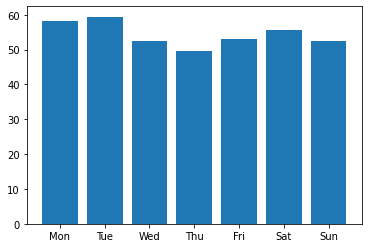

In [ ]:
# Using the above created list
# and finding the best and worst average latency
print("Average Latency: ", List_Latency)
# minimum latency the better

y = min(List_Latency)
index = List_Latency.index(y)
print("Best Average Latency: ", dictionary[index])

# maximum latency the worst
y = max(List_Latency)
index = List_Latency.index(y)
print("Worst Average Latency: ", dictionary[index])

# plotting a graph to identify the minimum and maximum latency

plt.bar(range(len(dictionary)), List_Latency, tick_label=dictionary)
plt.show()

Average Jitter:  [23.13, 19.88, 23.74, 21.43, 21.0, 20.79, 23.82]
Best Average Jitter:  Tue
Worst Average Jitter:  Sun


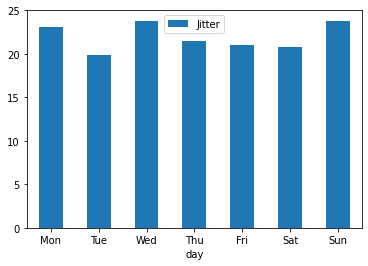

In [ ]:
# To find best and worst average jitter
print("Average Jitter: ", List_Jitter)
# minimum jitter the better

y = min(List_Jitter)
index = List_Jitter.index(y)
print("Best Average Jitter: ", dictionary[index])

# maximum jitter the worst
y = max(List_Jitter)
index = List_Jitter.index(y)
print("Worst Average Jitter: ", dictionary[index])

# plotting a graph to get the minimum jitter

jitter = pd.DataFrame({'day': dictionary, 'Jitter': List_Jitter})
Jitter = jitter.plot.bar(x='day', y='Jitter', rot=0)


Average Download:  [7.66, 7.0, 7.02, 8.14, 8.0, 6.53, 9.68]
Best Average Download:  Sun
Worst Average Download:  Sat


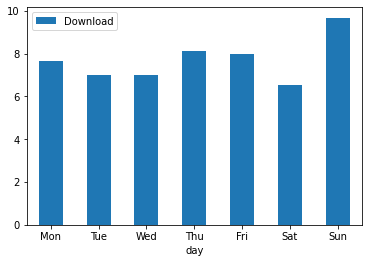

In [ ]:
# To find best and worst average download
print("Average Download: ", List_Download)

# minimum download the better
y = max(List_Download)
index = List_Download.index(y)
print("Best Average Download: ", dictionary[index])

# maximum download the worst
y = min(List_Download)
index = List_Download.index(y)
print("Worst Average Download: ", dictionary[index])

# plotting a graph to get the minimum download
download = pd.DataFrame({'day': dictionary, 'Download': List_Download})
Download = download.plot.bar(x='day', y='Download', rot=0)

Average Upload:  [2.52, 2.53, 2.38, 2.47, 2.76, 2.55, 2.76]
Best Average Upload Speed:  Fri
Worst Average Upload Speed:  Wed


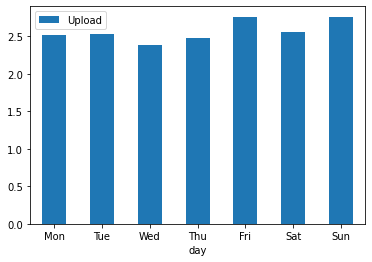

In [ ]:
# to find best and worst average upload speed
print("Average Upload: ", List_Upload)
# minimum upload the better
y = max(List_Upload)
index = List_Upload.index(y)
print("Best Average Upload Speed: ", dictionary[index])
# maximum upload the worst
y = min(List_Upload)
index = List_Upload.index(y)
print("Worst Average Upload Speed: ", dictionary[index])
# plotting a graph to get the minimum upload
upload = pd.DataFrame({'day': dictionary, 'Upload': List_Upload})
Upload = upload.plot.bar(x='day', y='Upload', rot=0)

Average Packet Loss:  [0.61, 0.46, 0.55, 0.42, 0.47, 0.46, 0.52]
Best Average Packet Loss:  Thu
Worst Average Packet Loss:  Mon


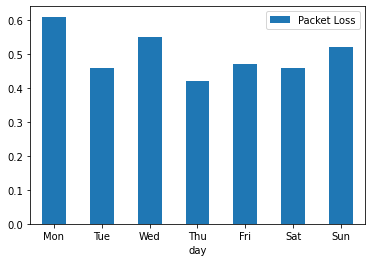

In [ ]:
# To find the best and worst average Packet Loss

print("Average Packet Loss: ", List_Packet_Loss)
# minimum jitter the better

y = min(List_Packet_Loss)
index = List_Packet_Loss.index(y)
print("Best Average Packet Loss: ", dictionary[index])

# maximum latency the worst
y = max(List_Packet_Loss)
index = List_Packet_Loss.index(y)
print("Worst Average Packet Loss: ", dictionary[index])

# plotting a graph to get the minimum latency

packet_loss = pd.DataFrame({'day': dictionary, 'Packet Loss': List_Packet_Loss})
Packet_Loss = packet_loss.plot.bar(x='day', y='Packet Loss', rot=0)

In [ ]:
# for network outage
COUNT_TUE = 0
COUNT_WED = 0
COUNT_THU = 0
COUNT_FRI = 0
COUNT_SAT = 0
COUNT_SUN = 0
COUNT_MON = 0
dic = {'Mon': 0, 'Tue': 0, 'Wed': 0, 'Thu': 0, 'Fri': 0, 'Sat': 0, 'Sun': 0}
for i in range(1, len(d) + 1):
    if(d[i]['day'] == 'Tue' and len(d[i]) == 3):
        COUNT_TUE += 1
    if(d[i]['day'] == 'Wed' and len(d[i]) == 3):
        COUNT_WED += 1
    if(d[i]['day'] == 'Thu' and len(d[i]) == 3):
        COUNT_THU += 1
    if(d[i]['day'] == 'Fri' and len(d[i]) == 3):
        COUNT_FRI += 1
    if(d[i]['day'] == 'Sat' and len(d[i]) == 3):
        COUNT_SAT += 1
    if(d[i]['day'] == 'Sun' and len(d[i]) == 3):
        COUNT_SUN += 1
    if(d[i]['day'] == 'Mon' and len(d[i]) == 3):
        COUNT_MON += 1
dic["Mon"] = COUNT_MON
dic['Tue'] = COUNT_TUE
dic['Wed'] = COUNT_WED
dic['Thu'] = COUNT_THU
dic['Fri'] = COUNT_FRI
dic['Sat'] = COUNT_SAT
dic['Sun'] = COUNT_SUN

print(dic)

{'Mon': 44, 'Tue': 197, 'Wed': 154, 'Thu': 0, 'Fri': 109, 'Sat': 172, 'Sun': 4}


Day with most Network Outages in a Week:  Tue
Day with least Network Outages in a Week:  Thu


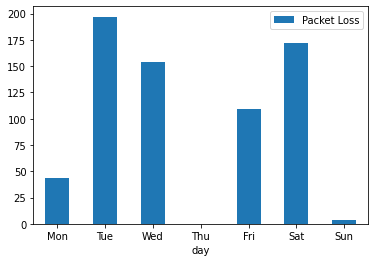

In [ ]:
# graphical representation of network outage
names = list(dic.keys())
values = list(dic.values())
x = min(values)
v = values.index(x)
y = values.index(max(values))
print("Day with most Network Outages in a Week: ", names[y])
print("Day with least Network Outages in a Week: ", names[v])
# plt.bar(range(len(dic)), values, tick_label=names)
# plt.show()
packet_loss = pd.DataFrame({'day': dictionary, 'Packet Loss': values})
Packet_Loss = packet_loss.plot.bar(x='day', y='Packet Loss', rot=0)

#Analysis of hours

In [ ]:
dic = ["Latency", "Jitter", "Download", "Upload", "Packet Loss"]
hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
diction = {}
Lat = []
jit = []
down = []
up = []
pack = []
for i in hour:
    mask = df['hours'] == i
    for j in dic:
        f = {}
        f[i] = round(df[mask][j].mean(), 2)
        if j == "Latency":
            Lat.append(round(df[mask][j].mean(), 2))
        if j == "Jitter":
            jit.append(round(df[mask][j].mean(), 2))
        if j == "Download":
            down.append(round(df[mask][j].mean(), 2))
        if j == "Upload":
            up.append(round(df[mask][j].mean(), 2))
        if j == "Packet Loss":
            pack.append(round(df[mask][j].mean(), 2))
print("Latency List: ", Lat, len(Lat), "\nJitter List: ", jit, len(jit),
      "\nDownload List: ", down, len(down))
print("Upload List: ", up, len(up), "\nPacket Loss: ", pack, len(Lat))

Latency List:  [46.96, 44.73, 45.66, 45.9, 46.04, 48.5, 45.16, 47.5, 44.8, 65.38, 59.02, 62.81, 56.9, 59.09, 53.41, 58.61, 50.99, 56.52, 57.94, 58.69, 59.57, 56.47, 58.49, 48.02] 24 
Jitter List:  [20.73, 21.57, 21.35, 21.22, 18.79, 20.71, 21.43, 21.3, 27.01, 22.93, 23.95, 26.98, 21.81, 25.01, 18.29, 22.4, 19.83, 23.16, 18.87, 19.9, 23.62, 19.14, 19.07, 27.33] 24 
Download List:  [9.16, 12.67, 16.49, 18.22, 19.4, 17.68, 12.91, 10.7, 8.21, 6.72, 6.22, 5.54, 5.69, 5.0, 5.47, 6.2, 5.99, 5.96, 5.59, 4.31, 4.97, 4.26, 3.6, 4.63] 24
Upload List:  [3.97, 4.44, 4.93, 4.88, 4.65, 3.76, 3.89, 3.28, 2.8, 2.06, 1.67, 1.78, 1.99, 1.95, 1.77, 1.82, 2.13, 1.94, 1.7, 1.71, 1.47, 1.49, 1.75, 2.97] 24 
Packet Loss:  [0.25, 0.44, 0.43, 0.63, 0.41, 0.51, 0.07, 1.3, 0.12, 0.61, 0.39, 0.47, 0.93, 0.49, 0.23, 0.6, 0.35, 0.44, 0.74, 0.68, 0.62, 0.81, 0.32, 0.12] 24


Best Latency per hour in a day is:  01 44.73
Worst Latency per hour in a day is:  09 65.38


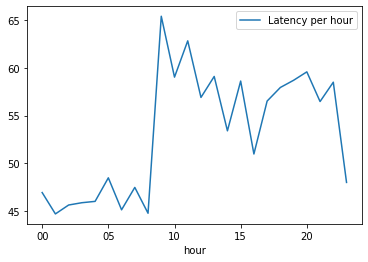

In [ ]:
# best and worst hour in terms of average latency
latency = pd.DataFrame({'hour': hour, 'Latency per hour': Lat})
Latency = latency.plot(x='hour', y='Latency per hour')
x = min(Lat)
index = Lat.index(x)
print("Best Latency per hour in a day is: ", hour[index], x)
y = max(Lat)
index = Lat.index(y)
print("Worst Latency per hour in a day is: ", hour[index], y)

Best Jitter per hour in a day is:  14 18.29
Worst Jitter per hour in a day is:  23 27.33


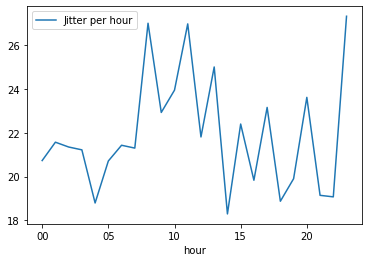

In [ ]:
# best and worst hour in terms of average jitter
jitter = pd.DataFrame({'hour': hour, 'Jitter per hour': jit})
Jitter = jitter.plot(x='hour', y='Jitter per hour')
x = min(jit)
index = jit.index(x)
print("Best Jitter per hour in a day is: ", hour[index], x)
y = max(jit)
index = jit.index(y)
print("Worst Jitter per hour in a day is: ", hour[index], y)

Best Download per hour in a day is:  04 19.4
Worst Download per hour in a day is:  22 3.6


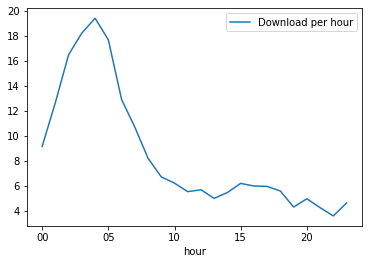

In [ ]:
# best and worst hour in terms of average download
download = pd.DataFrame({'hour': hour, 'Download per hour': down})
Download = download.plot(x='hour', y='Download per hour')
x = max(down)
index = down.index(x)
print("Best Download per hour in a day is: ", hour[index], x)
y = min(down)
index = down.index(y)
print("Worst Download per hour in a day is: ", hour[index], y)

Best Upload per hour in a day is:  02 4.93
Worst Upload per hour in a day is:  20 1.47


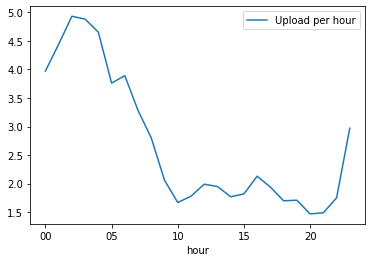

In [ ]:
# best and worst hour in terms of average upload
upload = pd.DataFrame({'hour': hour, 'Upload per hour': up})
Upload = upload.plot(x='hour', y='Upload per hour')
x = max(up)
index = up.index(x)
print("Best Upload per hour in a day is: ", hour[index], x)
y = min(up)
index = up.index(y)
print("Worst Upload per hour in a day is: ", hour[index], y)

Best Packet Loss per hour in a day is:  07 1.3
Worst Packet Loss per hour in a day is:  06 0.07


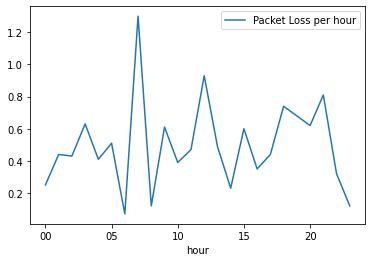

In [ ]:
# best and worst hour in terms of average packet loss
packet_loss = pd.DataFrame({'hour': hour, 'Packet Loss per hour': pack})
Packet_Loss = packet_loss.plot(x='hour', y='Packet Loss per hour')
x = max(pack)
index = pack.index(x)
print("Best Packet Loss per hour in a day is: ", hour[index], x)
y = min(pack)
index = pack.index(y)
print("Worst Packet Loss per hour in a day is: ", hour[index], y)

In [ ]:
# Creating a dictionary to find the most and least network outages
# Initizing the diction dictionary with hours as keys and all values as zeroes
dictiona = {}
for i in hour:
    dictiona[i] = 0
for keys, items in d.items():
    if len(items) == 3:
        COUNT = dictiona[items['hours']]
        dictiona[items['hours']] = COUNT + 1
print(dictiona)

{'00': 0, '01': 0, '02': 0, '03': 14, '04': 104, '05': 120, '06': 121, '07': 120, '08': 127, '09': 36, '10': 2, '11': 0, '12': 1, '13': 4, '14': 25, '15': 1, '16': 0, '17': 1, '18': 0, '19': 1, '20': 0, '21': 2, '22': 1, '23': 0}


most network outages is 127 happened in: 08 hour
Least networt outage is 0 happened in: 00 hour
Least networt outage is 0 happened in: 01 hour
Least networt outage is 0 happened in: 02 hour
Least networt outage is 0 happened in: 11 hour
Least networt outage is 0 happened in: 16 hour
Least networt outage is 0 happened in: 18 hour
Least networt outage is 0 happened in: 20 hour
Least networt outage is 0 happened in: 23 hour


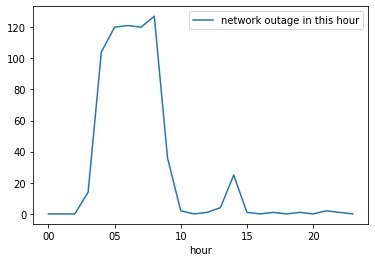

In [ ]:
# Using the above created dictionary to find the most and least network outages
keys = list(dictiona.keys())
values = list(dictiona.values())
x = max(values)
index = values.index(x)
print("most network outages is", x, "happened in:", keys[index], "hour")
x = min(values)
for idx, val in enumerate(values):
    if val == x:
        print("Least networt outage is", x, "happened in:", keys[idx], "hour")
outages = pd.DataFrame({'hour': keys, 'network outage in this hour': values})
Outage = outages.plot(x='hour', y='network outage in this hour')

#Overall Analysis

In [ ]:
df[['Latency', 'Jitter', 'Download', 'Upload', 'Packet Loss']] = \
    df[['Latency', 'Jitter', 'Download', 'Upload', 'Packet Loss']].fillna(np.nan)
x = df.groupby(['day', 'hours']).agg('mean')
pd.DataFrame(x)

Latency     Jitter   Download    Upload  Packet Loss
day hours                                                        
Fri 00     57.832333  15.937667  12.250714  3.857500     0.506667
    01     48.152000  21.561667  10.911000  4.342667     0.086667
    02     41.382000  21.915667  18.046000  5.303667     0.580000
    03     45.619000  24.510667  13.720000  5.198333     1.072727
    04     43.731071  22.507500  18.961923  5.524615     0.366667
...              ...        ...        ...       ...          ...
Wed 19     48.643462  20.671154   5.242692  1.780385     0.300000
    20     58.528571  30.975000   3.510000  0.775357     1.183333
    21     67.438667  31.541000   2.661333  0.943667     1.328571
    22     63.955333  14.920333   2.012667  1.231333     0.413333
    23     42.376333  26.118667   4.150333  2.487667     0.127273

[164 rows x 5 columns]

In [ ]:
# To find the best time for downloads, uploads
overall = x.groupby('day').agg(['idxmin', 'idxmax'])
for day in dictionary:
    for attr in {'Latency', 'Jitter', 'Download', 'Upload', 'Packet Loss'}:
        overall.loc[day, (attr, 'idxmin')] = \
            str(overall.loc[day, (attr, 'idxmin')][1]) + ':00'
        locat = str(overall.loc[day, (attr, 'idxmax')][1])
        overall.loc[day, (attr, 'idxmax')] = locat + ':00'
pd.DataFrame(overall)

In [ ]:
# To find best hour and time for low latency activities
pd.DataFrame({'Minimum at': x.idxmin(), 'Maximum at': x.idxmax()})
dataFrame = pd.DataFrame({'Minimum at': x.idxmin(), 'Maximum at': x.idxmax()})
print("Best day and hour for low latency activities is: ",
      dataFrame.loc['Latency']['Minimum at'][0],
      dataFrame.loc['Latency']['Minimum at'][1])

Best day and hour for low latency activities is:  Thu 02


In [ ]:
# To find the most connected Server
df['Server'].value_counts()
# x = list(df['Server'])
# de = {}
# for i in x:
#     COUNT = 0
#     if i in de:
#         COUNT = de[i]
#         de[i] = COUNT + 1
#     elif i != 'nan':
#         de[i] = COUNT + 1
# print("Connected Servers List: ", de)
# keys = list(de.keys())
# values = list(de.values())
# v = values.index(max(values))
# b = keys[v]
# print("\nThe most connected server is: ", b,
#       "\nNumber of times it connected: ", max(values))

Airtel Broadband - Chennai                           697
Airconnect Fibernet - Chennai                        563
Airgenie - Chennai                                   510
TataSky Broadband Private Limited - Chennai          406
Shyam Spectra - Chennai                              399
ACT Fibernet - Chennai                               399
Sri Vari Network Private Limited - Chennai           391
Cherrinet - K Net Solutions Pvt Ltd - Chennai        375
Jio - Chennai                                        329
Pulse Telesystems - Chennai                           41
Vi India - Chennai                                    34
Arjuntelecom - Chennai                                25
TATASky Broadband Pvt Ltd - Bangalore                  4
Surround Networks Pvt Ltd. - Bengaluru                 3
JIFFY CABLE AND DATACOM - Bangalore                    3
I-ON - Bengaluru                                       2
Airtel Broadband - Bangalore                           2
North East Dataa Network Pvt Lt